## Linear regression with one variable

First let us look at the dataset, the dataset is one variable that associate a pair of information (Diameter of Sand Granules Vs. Slope on Beach)

The data pairs are:

X = median diameter (mm) of granules of sand 
<br>
Y = gradient of beach slope in degrees

The data is from naturally occurring ocean beaches
<br>
Reference: Physical geography by A.M King, Oxford Press, England
<br>
we need to implement a predication model to predict the beach slope in degrees from given granules of sand median diameter.



Let's start by importing some libraries and examining the data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
path = os.getcwd() + '\\data\\linearRegression.csv'
data = pd.read_csv(path, header=None, names=['GranulesDiameter', 'BeachSlope'])
data
#data.head(n=2)

,GranulesDiameter,BeachSlope
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15
5,0.300,1.50
6,0.350,4.40
7,0.420,7.30
8,0.850,11.30


In [11]:
data.describe()

,GranulesDiameter,BeachSlope
count,9.000000,9.000000
mean,0.330000,3.186667
std,0.210698,3.789007
min,0.170000,0.630000
25%,0.220000,0.820000
50%,0.235000,1.150000
75%,0.350000,4.400000
max,0.850000,11.300000


getting better idea by plotting the data

,GranulesDiameter,BeachSlope
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15
5,0.300,1.50
6,0.350,4.40
7,0.420,7.30
8,0.850,11.30


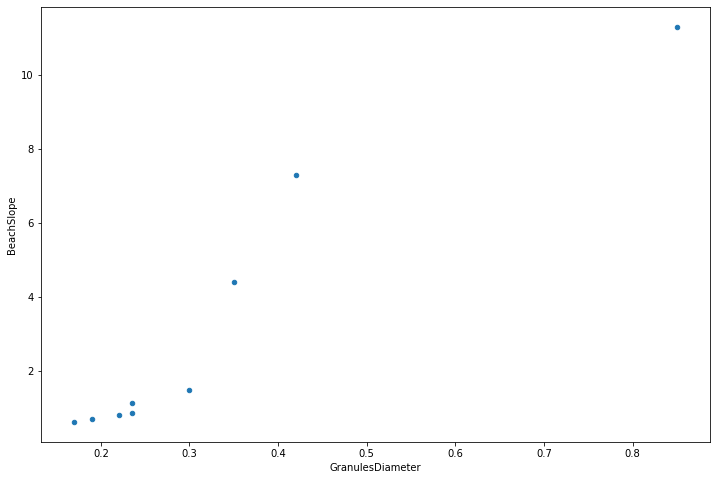

In [12]:
data.plot(kind='scatter', x='GranulesDiameter', y='BeachSlope', figsize=(12,8))
data

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [17]:
data.insert(0, 'Ones', 1)
data

,Ones,GranulesDiameter,BeachSlope
0,1,0.170,0.63
1,1,0.190,0.70
2,1,0.220,0.82
3,1,0.235,0.88
4,1,0.235,1.15
5,1,0.300,1.50
6,1,0.350,4.40
7,1,0.420,7.30
8,1,0.850,11.30


Now let's do some variable initialization.

In [30]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] # iloc slicing function 
y = data.iloc[:,cols-1:cols]
print (X)
print (y)

   Ones  GranulesDiameter
0     1             0.170
1     1             0.190
2     1             0.220
3     1             0.235
4     1             0.235
5     1             0.300
6     1             0.350
7     1             0.420
8     1             0.850
   BeachSlope
0        0.63
1        0.70
2        0.82
3        0.88
4        1.15
5        1.50
6        4.40
7        7.30
8       11.30


Let us vectorize

In [31]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
print (X)
print (X.shape)
print (y)
print (y.shape)
print (theta)
print (theta.shape)

[[1.         0.17      ]
 [1.         0.19      ]
 [1.         0.22      ]
 [1.         0.235     ]
 [1.         0.235     ]
 [1.         0.30000001]
 [1.         0.34999999]
 [1.         0.41999999]
 [1.         0.85000002]]
(9, 2)
[[ 0.63      ]
 [ 0.69999999]
 [ 0.81999999]
 [ 0.88      ]
 [ 1.14999998]
 [ 1.5       ]
 [ 4.4000001 ]
 [ 7.30000019]
 [11.30000019]]
(9, 1)
[[0 0]]
(1, 2)


make sure X (training set) and y (target variable) look correct.

In [35]:
X.shape, y.shape, theta.shape

((9, 2), (9, 1), (1, 2))

We are going first to use scikit-learn's linear regression function before we code the linear regression algorithm from scratch.
<br>
http://scikit-learn.org/stable/

In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X, y)
model.coef_ # get theta coefficients (model params)

array([[-2.47592505, 17.1593689 ]])

Plot the data and the linear regression model (the line in this case) from sklearn 

Text(0.5, 1.0, 'Predicted Granules Sand Diameter vs. Beach Slope ')

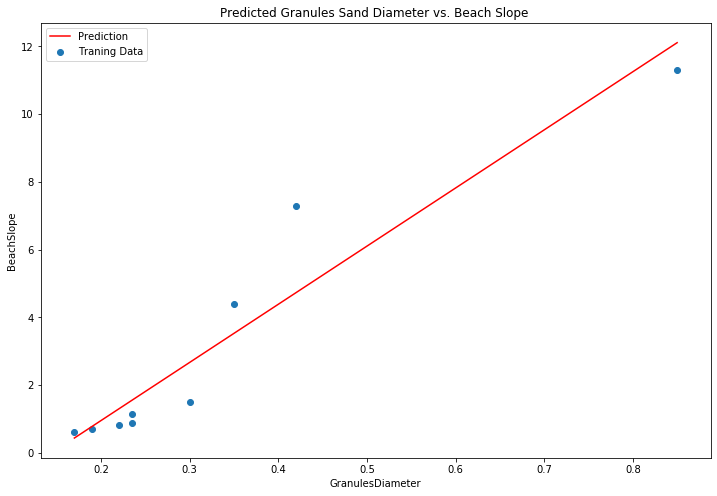

In [45]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('GranulesDiameter')
ax.set_ylabel('BeachSlope')
ax.set_title('Predicted Granules Sand Diameter vs. Beach Slope ')

Now let's implement linear regression using gradient descent to minimize the cost function. 

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).
<img src="img/eq2.png" width = 300>

In [49]:
def calcVectorizedCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

define and initilize theta (0,0)

In [50]:
theta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

Now let's compute the cost for our initial solution (0 values for theta).

In [53]:
calcVectorizedCost(X, y, theta)

11.458122656667785

This code defines a function to perform gradient descent on the parameters theta using the update rules:

<img src="img/eq1.png" width = 300>


In [54]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y 
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = calcVectorizedCost(X, y, theta)
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform, you can also define your own stop criteria.

In [55]:
alpha = 0.5
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [56]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
print (g)


[[-2.47592495 17.15936862]]


Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [57]:
calcVectorizedCost(X, y, g)

0.5711573874020037

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Granules Sand Diameter vs. Beach Slope ')

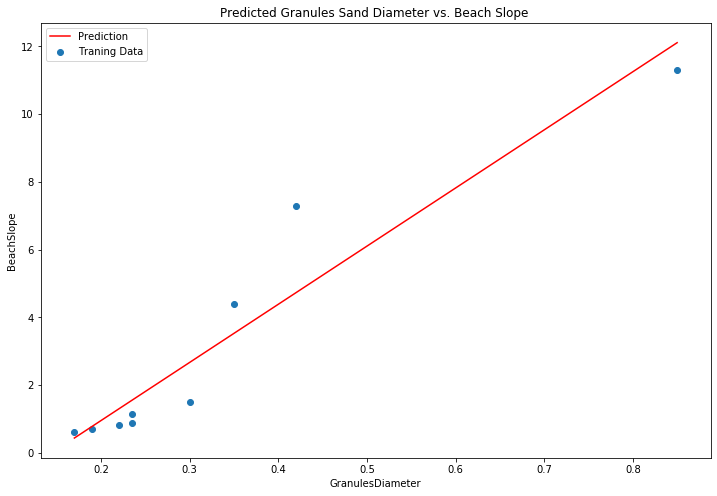

In [58]:
x = np.linspace(data.GranulesDiameter.min(), data.GranulesDiameter.max(), 100)

f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('GranulesDiameter')
ax.set_ylabel('BeachSlope')
ax.set_title('Predicted Granules Sand Diameter vs. Beach Slope ')

Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

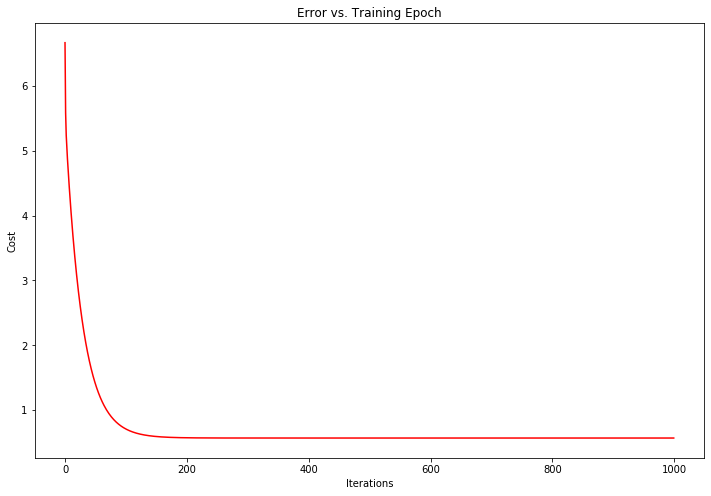

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')